/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │            48 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 60)             │         1,020 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,340 (5.23 KB)

 Trainable params: 1,340 (5.23 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/500
263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step - accuracy: 0.1020 - loss: 134.5373 - val_accuracy: 0.1178 - val_loss: 62.1063
Epoch 2/500
263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step - accuracy: 0.2766 - loss: 47.3759 - val_accuracy: 0.2778 - val_loss: 40.9401
Epoch 3/500
263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step - accuracy: 0.3459 - loss: 41.7240 - val_accuracy: 0.5533 - val_loss: 28.3102
Epoch 4/500
263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step - accuracy: 0.4919 - loss: 31.4706 - val_accuracy: 0.2844 - val_loss: 47.6896
Epoch 5/500
263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step - accuracy: 0.4241 - loss: 32.6342 - val_accuracy: 0.5111 - val_loss: 27.5964
Epoch 6/500
263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step - accuracy: 0.5287 - loss: 27.9153 - val_accuracy: 0.5244 - val_loss: 36.4982
Epoch 7/500
263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step - accuracy: 0.4672 - loss: 33.1950 - val_accuracy: 0.5822 - val_loss: 26.5133
Epoch 8/500
263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step - accuracy: 0

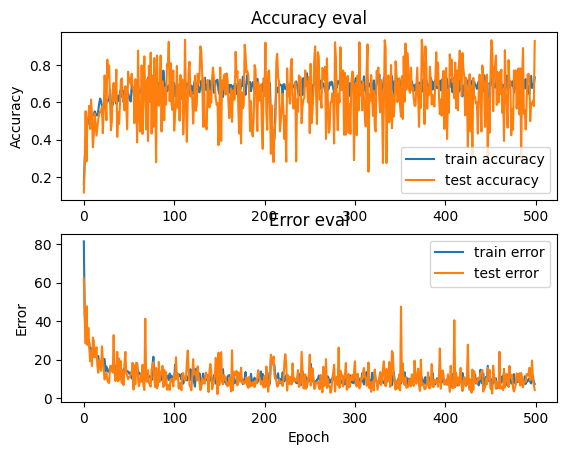

Modello salvato come Boyds2250_30agent_classOKok_seed12_9selFreeze.h5
Modello salvato come Boyds2250_30agent_classOKok_seed12_9selFreeze.keras!


In [1]:
# leggiamo i dati nel JSON file e adattiamoli per il modello
# questo modello implementa una regressione multivariata -- ossia con molteplici uscite,
# questo  non è un classificatore e quindi in genere non si usa un layer softmax
# e in teoria non servirebbe specificare una f.ne di attivazione

import json
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras as keras

def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs"""
    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()



with open("MLP_Boyds1500_30agent_classOKok_seed12_6selFreeze.json", "r") as f:
    data = json.load(f)

X = np.array(data["bidim"])  # shape (1500, 2)
mappings_raw = data["multidim"]  # shape (1500, 4, 2) in “lista di liste di liste”

# Adesso trasformi multidim in un array (1500, 300)
mappings_list = []
for i in range(len(mappings_raw)):  # 1500
    # Ogni elemento di mappings_raw[i] è una lista di 30 coppie
    # Flatten in un array di 8 valori
    flattened = []
    for (x, y) in mappings_raw[i]:
        flattened.append(x)
        flattened.append(y)
    mappings_list.append(flattened)

y = np.array(mappings_list)  # shape (1500, 60)
#labels = np.array(data["labels"])   # shape (1500,)

#readings.shape = (1500, 2)
#mappings.shape = (1500, 60)
#labels.shape = (1500,) (se ti serve per altri scopi, altrimenti potresti anche ignorarlo in fase di training, perché stai facendo una regressione).

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

# Definisco il modello
model = keras.Sequential([

    # Livello di input (2) + primo layer
    keras.layers.Dense(16, activation='relu', input_shape=(2,)),
    
    # Primo hidden layer
    keras.layers.Dense(16, activation='relu'),
    #keras.layers.Dense(10, activation='relu',kernel_regularizer=keras.regularizers.l2(0.001)),
    #keras.layers.Dropout(0.3),

    # Secondo hidden layer
    #keras.layers.Dense(5, activation='relu'),
    #keras.layers.Dense(10, activation='relu',kernel_regularizer=keras.regularizers.l2(0.001)),
    #keras.layers.Dropout(0.3),

    # Layer di output (60 neuroni), con activation lineare se vuoi valori liberi
    # (oppure 'sigmoid' se sai che gli output dovranno essere in [0,1], ecc.)
    keras.layers.Dense(60, activation='linear')
])


# Compilo il modello
optimiser=keras.optimizers.Adam(learning_rate=0.1)
model.compile(
    optimizer=optimiser,
    loss='mean_squared_error',
    metrics=['accuracy']
)

# Stampiamo una descrizione
model.summary()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# facciamo il training
history = model.fit(X_train, y_train, 
          validation_data=(X_test, y_test),
          epochs=500, 
          batch_size=4, 
          verbose=1)

plot_history(history)

# 8) Salvataggio del modello
model.save("Boyds1500_30agent_classOKok_seed12_6selFreeze.h5")  
print("Modello salvato come Boyds1500_30agent_classOKok_seed12_6selFreeze.h5")

model.save("Boyds1500_30agent_classOKok_seed12_6selFreeze.keras")
print("Modello salvato come Boyds1500_30agent_classOKok_seed12_6selFreeze.keras!")